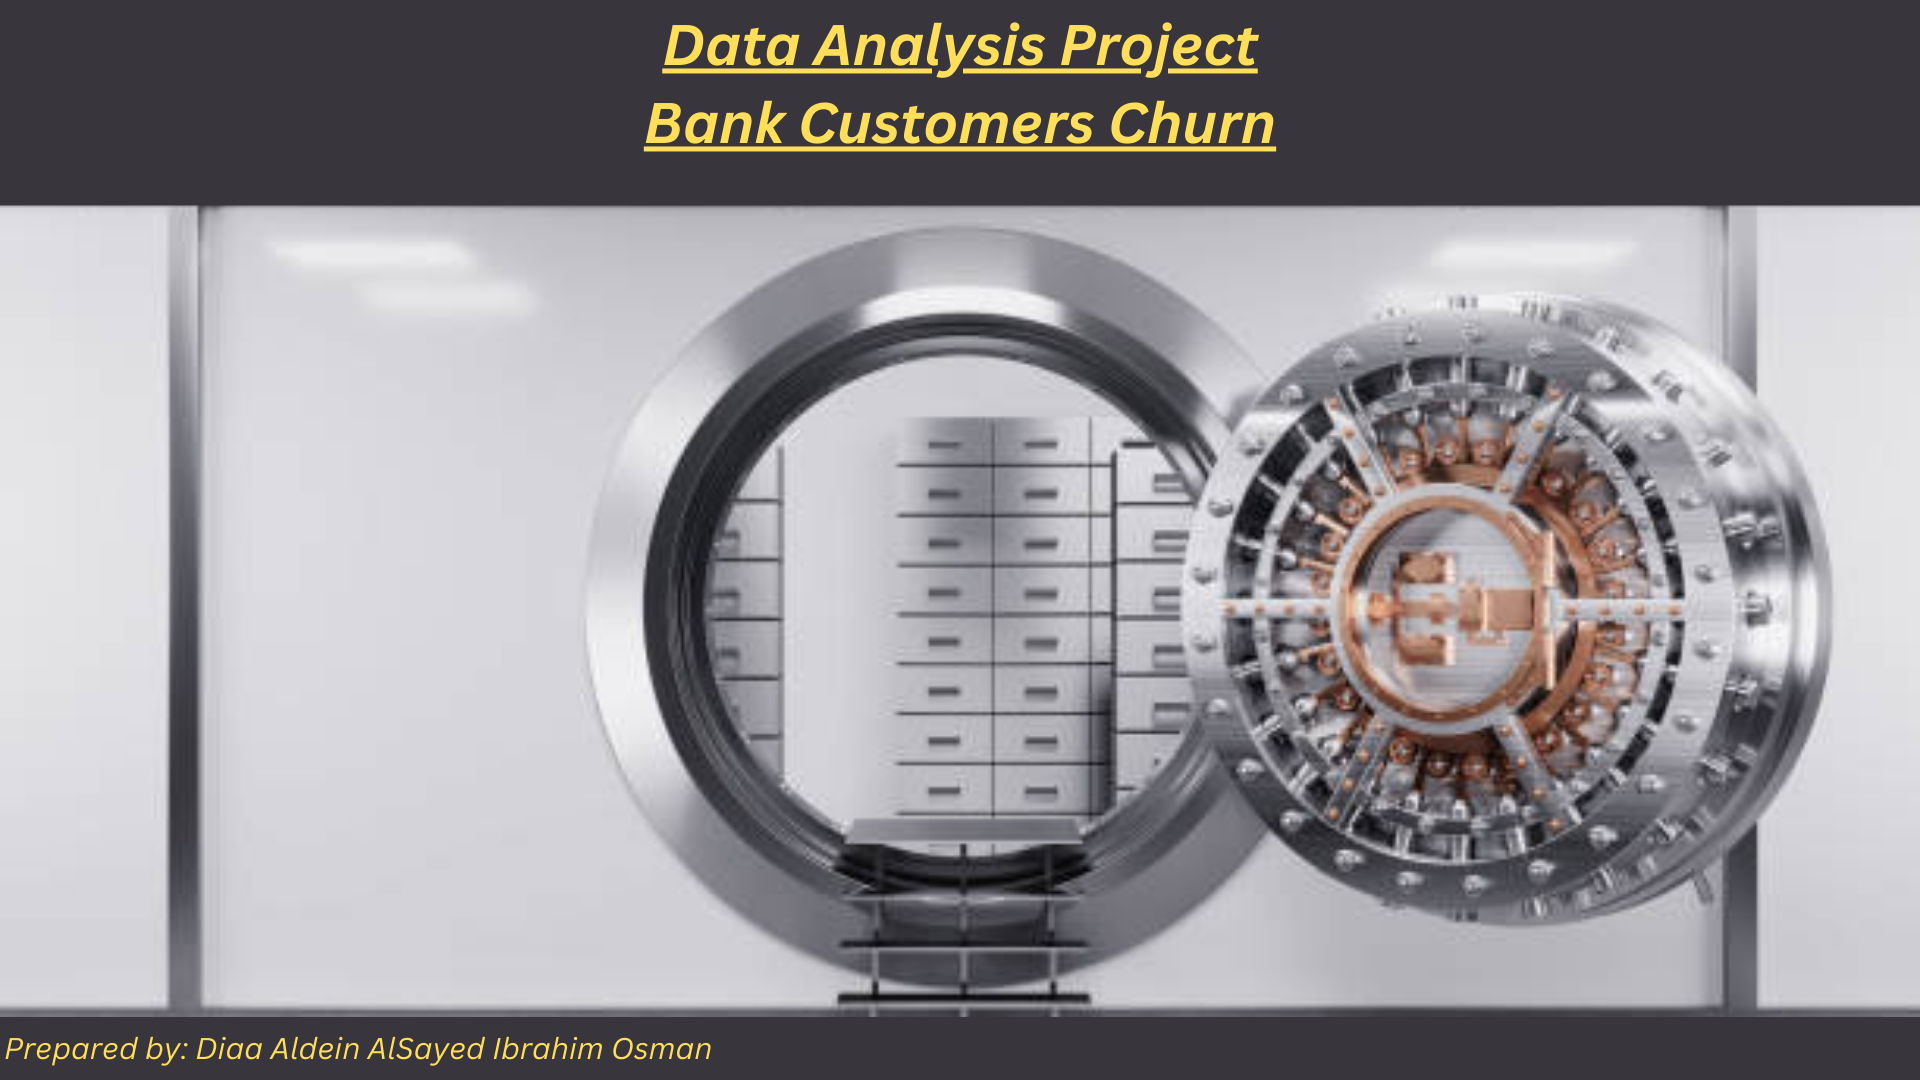

* In this project, we aim to analyze a dataset containing information about customers who have withdrawn their accounts from the bank due to various reasons, such as losses and other issues. 
------------
* The dataset consists of over 10,000 rows and contains 14 features, each providing valuable information about the customers. We obtained this dataset from Kaggle (https://www.kaggle.com/datasets/santoshd3/bank-customers) and made some modifications and tailor it to the specific criteria of this project.
------------
* Dataset Features: 
1.	RowNumber, 2.	CustomerId: identity number, 3.	Surname: last name, 4. CreditScore: Credit score of the customer, 5. Geography: Country or region, 6. Gender: Male or female, 7. Age: customer age, 8. Tenure: Number of years for which the customer has been with the bank 9. Balance: Amount in account, 10. NumOfProducts: Number of bank products the customer is utilising, 11. HasCrCard: Binary Flag for whether the customer holds a credit card with the bank or not, 12. IsActiveMember: active with different functionalities with bank like programs ,bonds,insurance etc., 13.	EstimatedSalary: Estimated salary of the customer in Dollars, 14. Exited: Binary flag 1 if the customer closed account with bank and 0 if the customer is retained
----------
* Project Objective:
The main goal of this analysis is to explore the relationship between each feature and customer churn. By examining these associations, we can identify which feature levels exhibit a higher churn rate and gain valuable insights into the factors influencing customer churn. Understanding these factors can help the bank take proactive measures to retain customers and improve overall customer satisfaction.

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the dataset.
df = pd.read_csv("Unclean Bank Customers Churn.csv")

## Data exploration & understanding

In [3]:
# Geitting Information about the Data
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10020 entries, 0 to 10019
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10020 non-null  int64  
 1   CustomerId       10020 non-null  int64  
 2   Surname          10020 non-null  object 
 3   CreditScore      9820 non-null   float64
 4   Geography        9950 non-null   object 
 5   Gender           9930 non-null   object 
 6   Age              10020 non-null  int64  
 7   Tenure           10020 non-null  int64  
 8   Balance          9920 non-null   object 
 9   NumOfProducts    10020 non-null  int64  
 10  HasCrCard        10020 non-null  int64  
 11  IsActiveMember   10020 non-null  int64  
 12  EstimatedSalary  10020 non-null  object 
 13  Exited           10020 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 1.1+ MB


In [4]:
# veiwing the head of the data the first 5 rows
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave        619.0    France  Female   42   
1          2    15647311      Hill        608.0     Spain  Female   41   
2          3    15619304      Onio        502.0    France  Female   42   
3          4    15701354      Boni        699.0    France  Female   39   
4          5    15737888  Mitchell        850.0     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2          0              1          1               1   
1       1   83807.86              1          0               1   
2       8   159660.8              3          1               0   
3       1          0              2          0               0   
4       2  125510.82              1          1               1   

  EstimatedSalary  Exited  
0       101348.88       1  
1       112542.58       0  
2       113931.57       1  
3        93826.63       0  
4         79084.1       0

* from info we can noticed that:
1. there is null values in CreditScore, Geography, Gender, and Balance columns.
2. there is problem in data type for Balance, and EstimatedSalary columns

In [5]:
# statistcal description for numeric features
df.describe()

RowNumber    CustomerId  CreditScore           Age        Tenure  \
count  10020.000000  1.002000e+04  9820.000000  10020.000000  10020.000000   
mean    5000.970160  1.569094e+07   650.497352     38.949401      5.013373   
std     2886.062112  7.192181e+04    96.451422     10.677608      2.892425   
min        1.000000  1.556570e+07   350.000000     18.000000      0.000000   
25%     2503.750000  1.562858e+07   584.000000     32.000000      3.000000   
50%     5001.500000  1.569074e+07   652.000000     37.000000      5.000000   
75%     7501.250000  1.575322e+07   717.000000     44.000000      7.000000   
max    10000.000000  1.581569e+07   850.000000    200.000000     10.000000   

       NumOfProducts    HasCrCard  IsActiveMember        Exited  
count   10020.000000  10020.00000    10020.000000  10020.000000  
mean        1.530339      0.70519        0.515070      0.203693  
std         0.581666      0.45598        0.499798      0.402763  
min         1.000000      0.00000        0.000000      0.000000  
25%         1.000000      0.00000        0.000000      0.000000  
50%         1.000000      1.00000        1.000000      0.000000  
75%         2.000000      1.00000        1.000000      0.000000  
max         4.000000      1.00000        1.000000      1.000000

* from the describe we can find that there is clear outlier in Age column max = 200

In [6]:
# statistcal description for categorical features
df.describe(include="O")

Surname Geography Gender Balance EstimatedSalary
count    10020      9950   9930    9920           10020
unique    2932         7     44    6318            9998
top      Smith    France   Male       0       168085.97
freq        32      4988   5383    3591               2

In [7]:
#checking for duplication in data 
df.duplicated().sum()

20

In [8]:
# Deal with duplicates by droping them
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

0

In [10]:
#checking for missing data
df.isna().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore        200
Geography           70
Gender              90
Age                  0
Tenure               0
Balance            100
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [11]:
# checking each column for wrong values or typing Error (Typos)
df['RowNumber'].unique().tolist()

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

In [12]:
df['CustomerId'].unique().tolist()

[15634602,
 15647311,
 15619304,
 15701354,
 15737888,
 15574012,
 15592531,
 15656148,
 15792365,
 15592389,
 15767821,
 15737173,
 15632264,
 15691483,
 15600882,
 15643966,
 15737452,
 15788218,
 15661507,
 15568982,
 15577657,
 15597945,
 15699309,
 15725737,
 15625047,
 15738191,
 15736816,
 15700772,
 15728693,
 15656300,
 15589475,
 15706552,
 15750181,
 15659428,
 15732963,
 15794171,
 15788448,
 15729599,
 15717426,
 15585768,
 15619360,
 15738148,
 15687946,
 15755196,
 15684171,
 15754849,
 15602280,
 15771573,
 15766205,
 15771873,
 15616550,
 15768193,
 15683553,
 15702298,
 15569590,
 15760861,
 15630053,
 15647091,
 15623944,
 15804771,
 15651280,
 15773469,
 15702014,
 15751208,
 15592461,
 15789484,
 15696061,
 15641582,
 15638424,
 15755648,
 15703793,
 15620344,
 15812518,
 15779052,
 15770811,
 15780961,
 15614049,
 15662085,
 15575185,
 15803136,
 15706021,
 15663706,
 15641732,
 15701164,
 15738751,
 15805254,
 15762418,
 15625759,
 15622897,
 15767954,
 15757535,

In [13]:
df['Surname'].unique().tolist() 

['Hargrave',
 'Hill',
 'Onio',
 'Boni',
 'Mitchell',
 'Chu',
 'Bartlett',
 'Obinna',
 'He',
 'H?',
 'Bearce',
 'Andrews',
 'Kay',
 'Chin',
 'Scott',
 'Goforth',
 'Romeo',
 'Henderson',
 'Muldrow',
 'Hao',
 'McDonald',
 'Dellucci',
 'Gerasimov',
 'Mosman',
 'Yen',
 'Maclean',
 'Young',
 'Nebechi',
 'McWilliams',
 'Lucciano',
 'Azikiwe',
 'Odinakachukwu',
 'Sanderson',
 'Maggard',
 'Clements',
 'Lombardo',
 'Watson',
 'Lorenzo',
 'Armstrong',
 'Cameron',
 'Hsiao',
 'Clarke',
 'Osborne',
 'Lavine',
 'Bianchi',
 'Tyler',
 'Martin',
 'Okagbue',
 'Yin',
 'Buccho',
 'Chidiebele',
 'Trevisani',
 "O'Brien",
 'Parkhill',
 'Yoo',
 'Phillipps',
 'Tsao',
 'Endrizzi',
 "T'ien",
 'Velazquez',
 'Hunter',
 'Clark',
 'Jeffrey',
 'Pirozzi',
 'Jackson',
 'Hammond',
 'Brownless',
 'Chibugo',
 'Glauert',
 'Pisano',
 'Konovalova',
 'McKee',
 'Palermo',
 'Ballard',
 'Wallace',
 'Cavenagh',
 'Hu',
 'Read',
 'Bushell',
 'Postle',
 'Buley',
 'Leonard',
 'Mills',
 'Onyeorulu',
 'Beit',
 'Ndukaku',
 'Gant',
 'Rowl

* there is some rong names start with letter then ? like H? needed to check with client for correct name but generaly it will not affect the study as this fetures not important in this project partculary. 

In [14]:
df['CreditScore'].unique().tolist()  # there is nan values

[619.0,
 608.0,
 502.0,
 699.0,
 850.0,
 645.0,
 822.0,
 376.0,
 501.0,
 684.0,
 528.0,
 497.0,
 476.0,
 549.0,
 635.0,
 616.0,
 653.0,
 587.0,
 726.0,
 732.0,
 636.0,
 510.0,
 669.0,
 846.0,
 577.0,
 756.0,
 571.0,
 574.0,
 411.0,
 591.0,
 533.0,
 553.0,
 520.0,
 722.0,
 475.0,
 490.0,
 804.0,
 582.0,
 472.0,
 465.0,
 556.0,
 834.0,
 660.0,
 776.0,
 829.0,
 637.0,
 550.0,
 698.0,
 585.0,
 788.0,
 655.0,
 601.0,
 656.0,
 725.0,
 511.0,
 614.0,
 742.0,
 687.0,
 555.0,
 603.0,
 751.0,
 581.0,
 nan,
 661.0,
 675.0,
 738.0,
 813.0,
 657.0,
 604.0,
 519.0,
 735.0,
 664.0,
 678.0,
 757.0,
 416.0,
 665.0,
 777.0,
 543.0,
 506.0,
 493.0,
 652.0,
 750.0,
 729.0,
 646.0,
 808.0,
 524.0,
 769.0,
 730.0,
 515.0,
 773.0,
 814.0,
 710.0,
 413.0,
 623.0,
 670.0,
 622.0,
 785.0,
 605.0,
 479.0,
 685.0,
 538.0,
 562.0,
 721.0,
 628.0,
 668.0,
 828.0,
 674.0,
 625.0,
 432.0,
 770.0,
 758.0,
 795.0,
 686.0,
 789.0,
 589.0,
 461.0,
 584.0,
 579.0,
 663.0,
 682.0,
 793.0,
 691.0,
 485.0,
 650.0,
 754.0,
 5

In [15]:
df['Geography'].unique().tolist() # there is nan values, typing Error

['France', 'Spain', 'Germany', nan, 'Francb', 'GermZny', 'Fyance', 'SGain']

In [16]:
df['Gender'].unique().tolist() # there is nan values, typing Error

['Female',
 'Male',
 'FemAle',
 'mAle',
 nan,
 'female',
 'MaLe',
 'FemaLE',
 'feMALE',
 'MaLE',
 'MALE',
 'FeMAlE',
 'FEMalE',
 'maLe',
 'feMAlE',
 'FeMaLE',
 'MalE',
 'fEmALE',
 'FEMale',
 'feMale',
 'mALe',
 'FemAlE',
 'MALe',
 'mALE',
 'femAlE',
 'FEMAlE',
 'FEMALe',
 'fEMaLE',
 'FeMALE',
 'male',
 'femalE',
 'FeMALe',
 'FemALE',
 'maLE',
 'MAle',
 'mAlE',
 'fEMALE',
 'FEmalE',
 'FEMaLe',
 'fEmAle',
 'femALE',
 'feMAle',
 'malE',
 'fEmalE',
 'MAlE']

In [17]:
df['Age'].unique().tolist()

[42,
 41,
 39,
 43,
 44,
 50,
 29,
 27,
 31,
 24,
 34,
 25,
 35,
 45,
 58,
 32,
 38,
 46,
 36,
 33,
 40,
 51,
 61,
 49,
 37,
 19,
 66,
 56,
 26,
 21,
 55,
 75,
 22,
 30,
 200,
 28,
 150,
 65,
 48,
 52,
 57,
 73,
 47,
 54,
 72,
 20,
 67,
 79,
 62,
 53,
 80,
 59,
 68,
 23,
 60,
 70,
 63,
 64,
 18,
 82,
 69,
 74,
 71,
 76,
 77,
 88,
 85,
 84,
 78,
 81,
 92,
 83]

In [18]:
df['Tenure'].unique().tolist()

[2, 1, 8, 7, 4, 6, 3, 10, 5, 9, 0]

In [19]:
df['Balance'].unique().tolist() # there is nan values, and rong values "?"

['0',
 '83807.86',
 '159660.8',
 '125510.82',
 '113755.78',
 '115046.74',
 '142051.07',
 '134603.88',
 '102016.72',
 '143129.41',
 '132602.88',
 '?',
 '136815.64',
 '141349.43',
 '59697.17',
 '85311.7',
 '110112.54',
 '134264.04',
 '145260.23',
 '76548.6',
 '70349.48',
 '122522.32',
 '117419.35',
 '131394.56',
 '155931.11',
 '109421.13',
 '112045.67',
 '137843.8',
 nan,
 '116363.37',
 '146050.97',
 '125561.97',
 '98495.72',
 '125211.92',
 '127864.4',
 '75888.2',
 '40685.92',
 '136857',
 '152328.88',
 '78707.16',
 '109166.37',
 '169831.46',
 '101633.04',
 '123180.01',
 '150725.53',
 '98373.26',
 '133745.44',
 '163607.18',
 '157780.84',
 '178718.19',
 '77253.22',
 '122189.66',
 '96645.54',
 '90307.62',
 '121681.82',
 '81623.67',
 '118626.55',
 '176273.95',
 '102827.44',
 '97086.4',
 '82674.15',
 '107073.27',
 '88938.62',
 '99806.85',
 '150092.8',
 '92833.89',
 '90536.81',
 '108055.1',
 '100238.35',
 '106190.55',
 '154475.54',
 '132351.29',
 '167864.4',
 '107818.63',
 '185173.81',
 '12943

In [20]:
df['NumOfProducts'].unique().tolist()

[1, 3, 2, 4]

In [21]:
df['HasCrCard'].unique().tolist()

[1, 0]

In [22]:
df['IsActiveMember'].unique().tolist() 

[1, 0]

In [23]:
df['EstimatedSalary'].unique().tolist() # there is rong values "x"

['101348.88',
 '112542.58',
 '113931.57',
 '93826.63',
 '79084.1',
 '149756.71',
 '10062.8',
 '119346.88',
 '74940.5',
 '71725.73',
 '80181.12',
 '76390.01',
 '26260.98',
 '190857.79',
 '65951.65',
 '64327.26',
 '5097.67',
 '14406.41',
 'x',
 '54724.03',
 '170886.17',
 '138555.46',
 '118913.53',
 '8487.75',
 '187616.16',
 '124508.29',
 '170041.95',
 '38433.35',
 '100187.43',
 '53483.21',
 '140469.38',
 '156731.91',
 '81898.81',
 '34410.55',
 '142033.07',
 '27822.99',
 '114066.77',
 '98453.45',
 '40812.9',
 '178074.04',
 '70154.22',
 '181297.65',
 '94153.83',
 '194365.76',
 '158338.39',
 '126517.46',
 '119708.21',
 '117622.8',
 '90878.13',
 '194099.12',
 '198059.16',
 '86424.57',
 '116978.19',
 '164040.94',
 '40014.76',
 '113410.49',
 '87107.57',
 '45613.75',
 '1643.11',
 '46775.28',
 '84509.57',
 '126494.82',
 '178798.13',
 '99398.36',
 '92840.67',
 '27758.36',
 '110431.51',
 '196673.28',
 '113656.85',
 '18203',
 '28373.86',
 '33953.87',
 '44203.55',
 '58426.81',
 '145562.4',
 '22388',

In [24]:
df['Exited'].unique().tolist()

[1, 0]

## Summery of Data exploration & understanding:

1. there is some rong names start with letter and ? like H? needed to check with client for correct name but generaly it will not affect the study as this fetures not important in this project partculary.
2. CreditScore Feature: there is nan values
3. Geography Feature:  there is nan values, typing Error
4. Gender Feature: there is nan values, typing Error
5. Age Feature: from discription there is clear outlier in Age column max = 200.
6. Balance Feature: there is nan values, and rong values "?", and from info there is problem in data type 
7. EstimatedSalary Feature: there is rong values "x", from info there is problem in data type 


# Data cleanig and Univariant analysis

In [25]:
# finding the percent of nan values to the data to determine how to deal with it or drop it
df.isna().mean()*100

RowNumber          0.0
CustomerId         0.0
Surname            0.0
CreditScore        2.0
Geography          0.7
Gender             0.9
Age                0.0
Tenure             0.0
Balance            1.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

* from the above the nan values it is only very small percent so we can drop it without affecting the data or we can deal with it by replacing it for numoric by mean if there is no outlier or median if there outlier, and for categorical columns we will replace it by the mode value and that is what I am going to use.

In [26]:
# CreditScore Feature: there is nan values
df['CreditScore'].isna().sum()

200

<AxesSubplot:xlabel='CreditScore'>

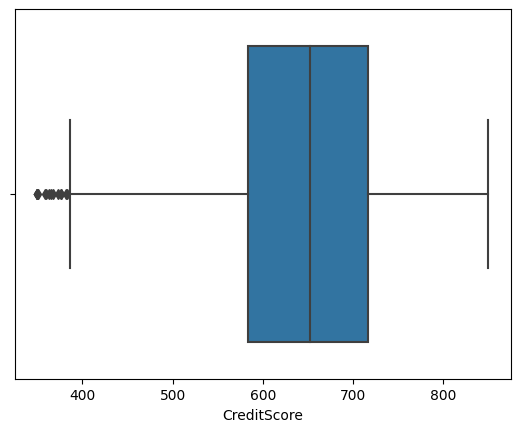

In [27]:
# using boxplot to find if there is outlier to find the best way to replace nan value 
sns.boxplot(data=df, x='CreditScore')

* From boxplot we find that there is small values outlier in the data so it is better to use median to fill nan values

In [28]:
# 1. CreditScore Median
df['CreditScore'].median()

652.0

In [29]:
# replacing nan value with the median
df['CreditScore'].fillna(df['CreditScore'].median(), inplace=True)

In [30]:
# checking if its working
df['CreditScore'].isna().sum()

0

In [31]:
# 2. Geography Feature: there is nan values, typing Error
df['Geography'].unique().tolist()

['France', 'Spain', 'Germany', nan, 'Francb', 'GermZny', 'Fyance', 'SGain']

In [32]:
# first we need to fix typing error
df['Geography'] = df['Geography'].replace('Francb', 'France')
df['Geography'] = df['Geography'].replace('GermZny', 'Germany')
df['Geography'] = df['Geography'].replace('Fyance', 'France')
df['Geography'] = df['Geography'].replace('SGain', 'Spain')

In [33]:
# checking
df['Geography'].unique().tolist()

['France', 'Spain', 'Germany', nan]

In [34]:
# Second fill nan vlaues with the mode as it is categorical value
df['Geography'].mode()

0    France
dtype: object

In [35]:
df['Geography'].fillna(df['Geography'].mode()[0], inplace=True)

In [36]:
df['Geography'].unique().tolist()

['France', 'Spain', 'Germany']

In [37]:
# visulizing Geography with histogram
px.histogram(df, x="Geography")

In [38]:
# 3. Gender Feature: there is nan values, typing Error
df['Gender'].unique().tolist()

['Female',
 'Male',
 'FemAle',
 'mAle',
 nan,
 'female',
 'MaLe',
 'FemaLE',
 'feMALE',
 'MaLE',
 'MALE',
 'FeMAlE',
 'FEMalE',
 'maLe',
 'feMAlE',
 'FeMaLE',
 'MalE',
 'fEmALE',
 'FEMale',
 'feMale',
 'mALe',
 'FemAlE',
 'MALe',
 'mALE',
 'femAlE',
 'FEMAlE',
 'FEMALe',
 'fEMaLE',
 'FeMALE',
 'male',
 'femalE',
 'FeMALe',
 'FemALE',
 'maLE',
 'MAle',
 'mAlE',
 'fEMALE',
 'FEmalE',
 'FEMaLe',
 'fEmAle',
 'femALE',
 'feMAle',
 'malE',
 'fEmalE',
 'MAlE']

In [39]:
# first we need to fill na with letter x for example
df['Gender'].fillna("x", inplace=True)

In [40]:
# Second we need to fix typing error by creating function as follow:
def gender(x):
    if x[0] in ["F","f","M","m"]:
        return x.capitalize()
    else:
        return x

In [41]:
# then using apply function 
df['Gender'] = df['Gender'].apply(gender)

In [42]:
df['Gender'].unique().tolist()

['Female', 'Male', 'x']

In [43]:
# lastly we are going to deal with "x" by replacing it with the mode
df['Gender'].mode()

0    Male
dtype: object

In [44]:
df['Gender'] = df['Gender'].replace("x", df['Gender'].mode()[0])

In [45]:
df['Gender'].value_counts()

Male      5501
Female    4499
Name: Gender, dtype: int64

In [46]:
# Visulaizing Gender using Histogram
px.histogram(df, x="Gender")

In [47]:
# 4. Age Feature: from discription there is clear outlier in Age column max = 200.
px.box(df, x = "Age")

* boxplot show there is many outlier above the age 62 but until 92 year it is logical age but there two age are not logical 150 and 200 years we need to deal with them by replacing them with the median.

In [48]:
# replacing unlogical age by median
df["Age"].median()

37.0

In [49]:
df["Age"] = df["Age"].replace(150, df["Age"].median())
df["Age"] = df["Age"].replace(200, df["Age"].median())

In [50]:
# Visulaizing Age using boxplot
px.box(df, x = "Age")

In [51]:
# 5.Balance Feature: there is nan values, and rong values "?", and from info there is problem in data type
# first dealing with "?" by changin it to nan value
df[df["Balance"] == "?"]

RowNumber  CustomerId Surname  CreditScore Geography Gender  Age  Tenure  \
23         24    15725737  Mosman        669.0    France   Male   46       3   
48         49    15766205     Yin        550.0   Germany   Male   38       2   

   Balance  NumOfProducts  HasCrCard  IsActiveMember EstimatedSalary  Exited  
23       ?              2          0               1         8487.75       0  
48       ?              1          0               1        90878.13       0

In [52]:
# saving the index of value "?" in variable q
q = df[df["Balance"] == "?"].index

In [53]:
# using iloc to replace "?" with np.nan
df["Balance"].iloc[q] = np.nan

In [54]:
df[df["Balance"] == "?"]

Empty DataFrame
Columns: [RowNumber, CustomerId, Surname, CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited]
Index: []

In [55]:
# second changing the data type from object to numoric
df["Balance"] = pd.to_numeric(df["Balance"])

In [56]:
# checking for outlier using boxplot
px.box(df, x = "Balance")

* as long as the box plot showing that there is no outlier we are going to use the mean to replace the nan values

In [57]:
# replacing the nan value with mean value
df["Balance"].isna().sum()

102

In [58]:
round(df["Balance"].mean(), 2)

76484.76

In [59]:
df["Balance"] = df["Balance"].replace(np.nan, round(df["Balance"].mean(), 2))

In [60]:
df["Balance"].isna().sum()

0

In [61]:
# 6. EstimatedSalary Feature: there is rong values "x", from info there is problem in data type
df[df['EstimatedSalary'] == "x"]

RowNumber  CustomerId   Surname  CreditScore Geography Gender  Age  \
18          19    15661507   Muldrow        587.0     Spain   Male   45   
254        255    15665834  Cheatham        696.0     Spain   Male   28   

     Tenure  Balance  NumOfProducts  HasCrCard  IsActiveMember  \
18        6      0.0              1          0               0   
254       8      0.0              1          0               0   

    EstimatedSalary  Exited  
18                x       0  
254               x       0

In [62]:
# checking for outlier using boxplot
px.box(df, x="EstimatedSalary")

* as boxplot show that there is no outlier we are going to replace the x values with the mean

In [63]:
# replaceing x values with nan value then geting the mean value to fill nan with it
df['EstimatedSalary'] = df['EstimatedSalary'].replace("x", np.nan)

In [64]:
# changing data type from object to numeric
df['EstimatedSalary'] = pd.to_numeric(df['EstimatedSalary'])

In [65]:
df['EstimatedSalary'].isna().sum()

2

In [66]:
round(df['EstimatedSalary'].mean(), 2)

100076.72

In [67]:
df['EstimatedSalary'] = df['EstimatedSalary'].fillna(round(df['EstimatedSalary'].mean(), 2))

In [68]:
df['EstimatedSalary'].isna().sum()

0

In [69]:
# checking Data info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  float64
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [70]:
# statistcal description for numerical features
df.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.531300     38.921000      5.012800   
std     2886.89568  7.193619e+04     95.491391     10.487562      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    585.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    716.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76484.758380       1.530200      0.70550        0.515100   
std     62065.139001       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     96476.700000       1.000000      1.00000        1.000000   
75%    127334.445000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited  
count     10000.000000  10000.000000  
mean     100076.715397      0.203700  
std       57502.400505      0.402769  
min          11.580000      0.000000  
25%       51002.110000      0.000000  
50%      100168.240000      0.000000  
75%      149373.527500      0.000000  
max      199992.480000      1.000000

In [71]:
# statistcal description for categorical feature
df.describe(include="O")

Surname Geography Gender
count    10000     10000  10000
unique    2932         3      2
top      Smith    France   Male
freq        32      5050   5501

## Features engineering

1. Creating Credit Score Category: Group the "CreditScore" feature into categories ("Low," "Medium," "High").
2. Creating Age groups feature: Young: Age less than 30, Middle-Aged: Age between 30 and 50 (inclusive), Senior: Age greater than 50
3. Creating Account Tenure Group: Categorize "Tenure" into groups ("Short-Term," "Medium-Term," "Long-Term").
4. Balance Category: Group the "Balance" feature into categories ("Low," "Medium," "High").
5. Crating Credit Utilization Ratio: Calculate the ratio of "Balance" to "CreditScore" to understand how much of the available credit customers are using.
6. Interaction Score: Create a new feature that aggregates multiple customer interactions (e.g., "NumOfProducts," "HasCrCard," "IsActiveMember") into a single score representing customer engagement.
7. Estimated Salary Range: Group the "EstimatedSalary" into ranges (e.g., "Low," "Medium," "High").
8. One Hot encoding for Gender Feature

1] Creating Credit Score Category: Group the "CreditScore" feature into categories ("Low," "Medium," "High").

In [72]:
df["CreditScore"].describe()

count    10000.000000
mean       650.531300
std         95.491391
min        350.000000
25%        585.000000
50%        652.000000
75%        716.000000
max        850.000000
Name: CreditScore, dtype: float64

In [73]:
# Create a function to map Credit Score to Credit Score group

def credit_score(x):
    if x < 600:
        return "Low"
    elif x >= 600 and x <700:
        return "Medium"
    else:
        return "High"

In [74]:
# Apply the function to create the "Credit Score Category" feature
df["Credit Score Category"] = df["CreditScore"].apply(credit_score)

2] Creating Age groups feature:

1. Young: Age less than 30
2. Middle-Aged: Age between 30 and 50 (inclusive)
3. Senior: Age greater than 50

In [75]:
# Create a function to map age to age group
def age_group(x):
    if x < 30:
        return "Young"
    elif x >= 30 and x <=50:
        return "Middle-Aged"
    else:
        return "Senior"

In [76]:
# Apply the function to create the "Age Group" feature
df["Age Group"] = df["Age"].apply(age_group) 

3] Creating Account Tenure Group: Categorize "Tenure" into groups ("Short-Term," "Medium-Term," "Long-Term").

In [77]:
df["Tenure"].unique().tolist()

[2, 1, 8, 7, 4, 6, 3, 10, 5, 9, 0]

In [78]:
# Create a function to map Tuner to Tuner group
def tenure_group(x):
    if x <= 2:
        return "Short-Term"
    elif x > 2 and x <=5:
        return "Medium-Term"
    else:
        return "Long-Term"

In [79]:
# Apply the function to create the "Tenure Group" feature
df["Tenure Group"] = df["Tenure"].apply(tenure_group) 

4] Balance Category: Group the "Balance" feature into categories ("Low," "Medium," "High").

In [80]:
# Create a function to map Balance to Balance group
def balance_group(x):
    if x <= 0:
        return "Zero"
    elif x < 50000:
        return "Low"
    elif x >= 50000 and x <100000:
        return "Medium"
    else:
        return "High"

In [81]:
# Apply the function to create the "Balance group" feature
df["Balance Category"] = df["Balance"].apply(balance_group)

5] Crating Credit Utilization Ratio: Calculate the ratio of "Balance" to "CreditScore" to understand how much of the available credit customers are using.

In [82]:
df['Credit Utilization Ratio'] = df['Balance'] / df['CreditScore']

6] Interaction Score: Create a new feature that aggregates multiple customer interactions (e.g., "NumOfProducts," "HasCrCard," "IsActiveMember") into a single score representing customer engagement.

In [83]:
df['Interaction Score'] = df['NumOfProducts'] + df['HasCrCard'] + df['IsActiveMember']

7] Estimated Salary Range: Group the "EstimatedSalary" into ranges (e.g., "Low," "Medium," "High").

In [84]:
# Create a function to map EstimatedS alary into Estimated Salary group
def salary_range(x):
    if x < 50000:
        return 'Low'
    elif x < 100000:
        return 'Medium'
    else:
        return 'High'

In [85]:
# Apply the function to create the 'Estimated Salary Range' feature
df['Estimated Salary Range'] = df['EstimatedSalary'].apply(salary_range)

8] One Hot encoding for Gender Feature

In [86]:
# using pandas get_dummies method for Gender one hot encoding:
df = pd.get_dummies(df, columns = ["Gender"], drop_first=True)

In [87]:
df.head(2)

RowNumber  CustomerId   Surname  CreditScore Geography  Age  Tenure  \
0          1    15634602  Hargrave        619.0    France   42       2   
1          2    15647311      Hill        608.0     Spain   41       1   

    Balance  NumOfProducts  HasCrCard  ...  EstimatedSalary  Exited  \
0      0.00              1          1  ...        101348.88       1   
1  83807.86              1          0  ...        112542.58       0   

   Credit Score Category    Age Group Tenure Group Balance Category  \
0                 Medium  Middle-Aged   Short-Term             Zero   
1                 Medium  Middle-Aged   Short-Term           Medium   

  Credit Utilization Ratio  Interaction Score  Estimated Salary Range  \
0                 0.000000                  3                    High   
1               137.841875                  2                    High   

  Gender_Male  
0           0  
1           0  

[2 rows x 21 columns]

# Lets Start Analysis

In [88]:
# How many numbers of customers churn and by what percent
df["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [89]:
# the percent of customers who Exit the Bank as follow:
df["Exited"].value_counts()[1]*100/df.shape[0]

20.37

In [90]:
# creating churn variuble
churn = df["Exited"].value_counts().reset_index()
churn.head()

index  Exited
0      0    7963
1      1    2037

In [91]:
# pie chart to visualize the percent of customers by churn rate.
px.pie(churn, values="Exited", names = "index", title = "Churned Rate", color_discrete_sequence=px.colors.sequential.Bluered, width=800, height=400)

In [92]:
# histogram chart to visualize the count or number of customers by churn status.
px.histogram(df, x = df["Exited"], color="Exited", width= 800, height= 400)

*  The above graphs show that There is 2037 customers exit from the bank out of 10000 customers. They are representing almost 20% of total customers.

For this project the RowNumber, CustomerId, and Surname have no effect on churn so we can drop them or neglict them as it is Data Analysis project.
We can start with CreditScore to check its impact on customer churn and Credit Score Category to determine which level have more effect on churning.

### 1. CreditScore & Credit Score Category Features:

In [93]:
# Calculate average CreditScore Ratio for churned and not churned customers
avg_CreditScore_churned = df[df['Exited'] == 1]['CreditScore'].mean()
avg_CreditScore_not_churned = df[df['Exited'] == 0]['CreditScore'].mean()

print("Average Credit Score Ratio for Churned Customers:", avg_CreditScore_churned)
print("Average Credit Score Ratio for Not Churned Customers:", avg_CreditScore_not_churned)

Average Credit Score Ratio for Churned Customers: 645.3809523809524
Average Credit Score Ratio for Not Churned Customers: 651.8488007032526


Text(0.5, 1.0, 'CreditScore by Churn Status')

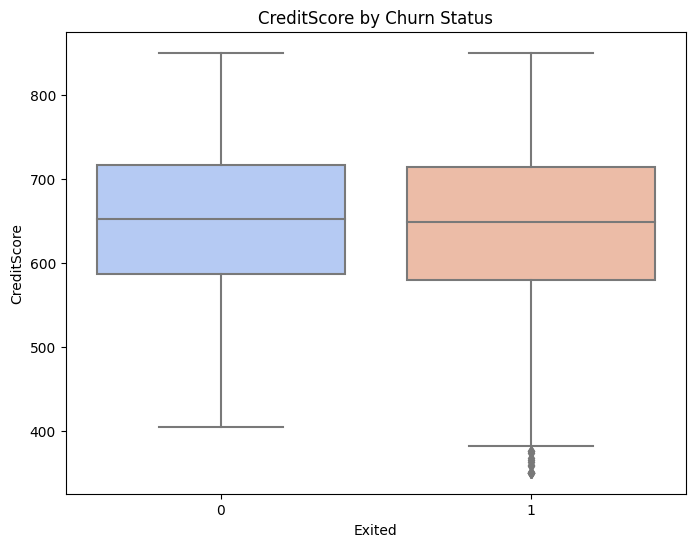

In [94]:
# Boxplot to visualize the Credit Scor by Churn Status
plt.figure(figsize=(8, 6))
sns.boxplot(x='Exited', y='CreditScore', data=df, palette='coolwarm')
plt.title('CreditScore by Churn Status')

* The above boxplot graph show the relation ship between Credit Score and Churning. We observed a clear trend indicating that customers with lower Credit Scores are more likely to churn.

In [95]:
# Vlaue counts for each level of Credit Score Category
df["Credit Score Category"].value_counts()

Medium    3948
High      3083
Low       2969
Name: Credit Score Category, dtype: int64

In [96]:
# Getting churned rate by each level of Credit Score Category to determine which level have greater effect on churned customer.
churn_by_CreditScoreCategory = df.groupby("Credit Score Category")['Exited'].mean().sort_values(ascending=False)
churn_by_CreditScoreCategory

Credit Score Category
Low       0.217582
Medium    0.198328
High      0.197211
Name: Exited, dtype: float64

Text(0.5, 1.0, 'Churn Rate by Credit Score Category')

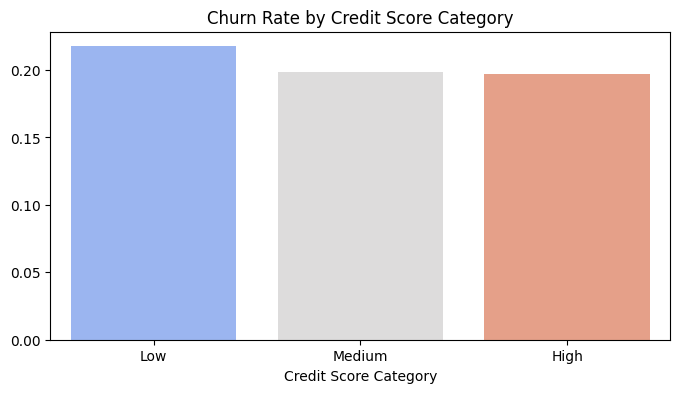

In [97]:
# Barplot graph Reflect the Churn Rate by each level of th Credit Score Category feature.
plt.figure(figsize=(8, 4))
sns.barplot(x=churn_by_CreditScoreCategory.index, y=churn_by_CreditScoreCategory.values, palette='coolwarm')
plt.title('Churn Rate by Credit Score Category')

* The graph & ratio show that there is little difference between level but the grater ratio is almost 22% of the total 2,969 customers falling into the "low Credit Score" category (Credit Score less than 600) have churned.

### 2. Geography Feature:

In [98]:
# Vlue counts for each level of Geography Feature.
df["Geography"].value_counts()

France     5050
Germany    2493
Spain      2457
Name: Geography, dtype: int64

In [99]:
# Getting churned rate by each level of Geography Feature. 
churn_by_Geography = df.groupby("Geography")['Exited'].mean().sort_values(ascending=False)
churn_by_Geography

Geography
Germany    0.323706
Spain      0.166056
France     0.162772
Name: Exited, dtype: float64

Text(0.5, 1.0, 'Churn Rate by Geography')

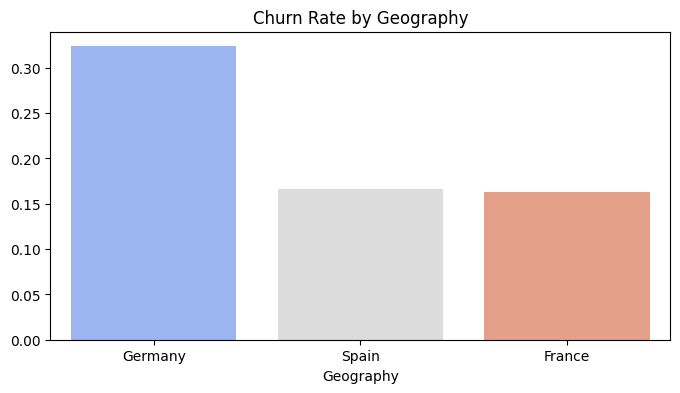

In [100]:
# Barplot graph Reflect the Churn Rate by each level of Geography Feature.
plt.figure(figsize=(8, 4))
sns.barplot(x=churn_by_Geography.index, y=churn_by_Geography.values, palette='coolwarm')
plt.title('Churn Rate by Geography')

* From the above ratio & graph it apear that Although France have 5050 customers only 16% of them are churned while the grater ratio of churned on the Germany level which have 2493 Total customers 32% of them are churned. 

### 3. Gender_Male Feature:

In [101]:
# Vlue counts for each level of Gender_Male Feature.
df["Gender_Male"].value_counts()

1    5501
0    4499
Name: Gender_Male, dtype: int64

In [102]:
# Getting churned rate by each level of Gender_Male Feature. 
churn_by_Gender_Male = df.groupby("Gender_Male")['Exited'].mean()
churn_by_Gender_Male

Gender_Male
0    0.250722
1    0.165243
Name: Exited, dtype: float64

Text(0.5, 1.0, 'Churn Rate by Gender_Male')

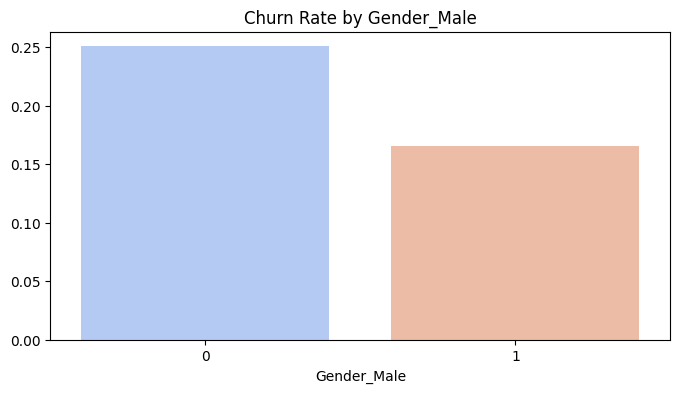

In [103]:
# Barplot graph Reflect the Churn Rate by each level of Gender Feature.
plt.figure(figsize=(8, 4))
sns.barplot(x=churn_by_Gender_Male.index, y=churn_by_Gender_Male.values, palette='coolwarm')
plt.title('Churn Rate by Gender_Male')

* From the above Churn Rate by Gender_Male graph it apear that the churn rate is higher for female customers, with 25% of the total 4,499 female customers churning.

### 4. Age & Age Group Feature:

In [104]:
# Calculate average Age Ratio for churned and not churned customers
avg_Age_churned = df[df['Exited'] == 1]['Age'].mean()
avg_Age_not_churned = df[df['Exited'] == 0]['Age'].mean()

print("Average Age Ratio for Churned Customers:", avg_Age_churned)
print("Average Age Ratio for Not Churned Customers:", avg_Age_not_churned)

Average Age Ratio for Churned Customers: 44.833578792341676
Average Age Ratio for Not Churned Customers: 37.40851437900289


Text(0.5, 1.0, 'Age by Churn Status')

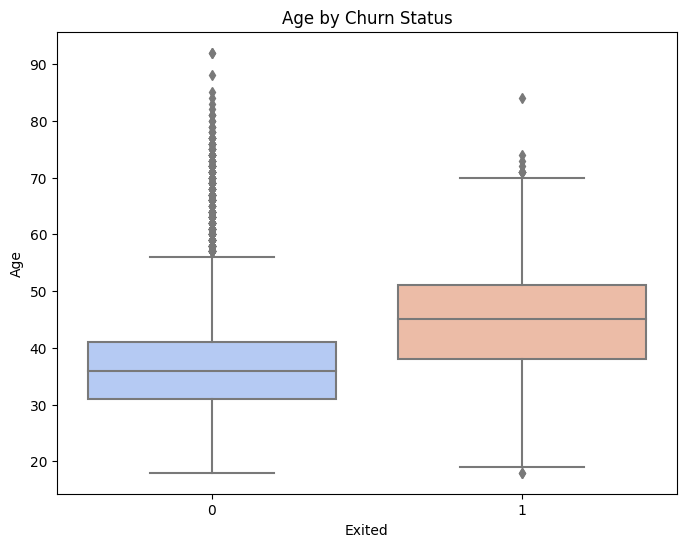

In [105]:
# Boxplot to visualize the Age by Churn Status
plt.figure(figsize=(8, 6))
sns.boxplot(x='Exited', y='Age', data=df, palette='coolwarm')
plt.title('Age by Churn Status')

* The above graph show the relation ship between Age and Churning. The Higher the Age, more are the chances to churn.

In [106]:
# Vlue counts for each level of Age Group Feature.
df["Age Group"].value_counts()

Middle-Aged    7098
Young          1641
Senior         1261
Name: Age Group, dtype: int64

In [107]:
# Getting churned rate by each level of Age Group Feature. 
churn_by_Age_Group = df.groupby("Age Group")['Exited'].mean().sort_values(ascending=False)
churn_by_Age_Group

Age Group
Senior         0.446471
Middle-Aged    0.190194
Young          0.075564
Name: Exited, dtype: float64

Text(0.5, 1.0, 'Churn Rate by Age Group')

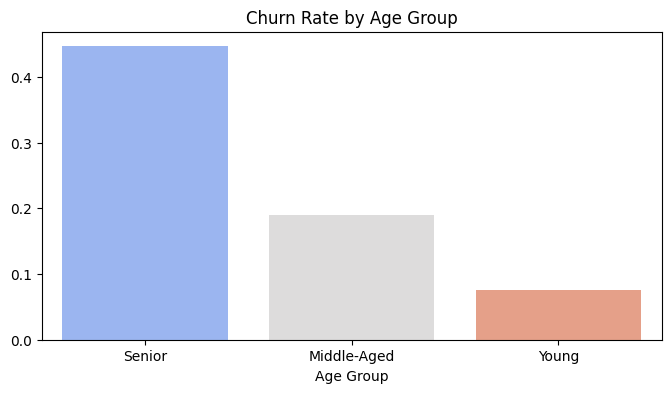

In [108]:
# Barplot graph Reflect the Churn Rate by each level of Age Group Feature.
plt.figure(figsize=(8, 4))
sns.barplot(x=churn_by_Age_Group.index, y=churn_by_Age_Group.values, palette='coolwarm')
plt.title('Churn Rate by Age Group')

* from the above ratio & graph it apear that a substantial 45% of the 1,261 customers in the Senior Age Group (above 50 years) have churned, which contradicts the expectation that older customers typically show resistance to change unless there pand. So if there is no pandemic disease where there is high death rate among senior people like coronavirus this very strange.

### 5. Tenure & Tenure Group Feature:

In [109]:
# Calculate average Tenure Ratio for churned and not churned customers
avg_Tenure_churned = df[df['Exited'] == 1]['Tenure'].mean()
avg_Tenure_not_churned = df[df['Exited'] == 0]['Tenure'].mean()

print("Average Tenure Ratio for Churned Customers:", avg_Tenure_churned)
print("Average Tenure Ratio for Not Churned Customers:", avg_Tenure_not_churned)

Average Tenure Ratio for Churned Customers: 4.932744231713304
Average Tenure Ratio for Not Churned Customers: 5.033278914981791


Text(0.5, 1.0, 'Tenure by Churn Status')

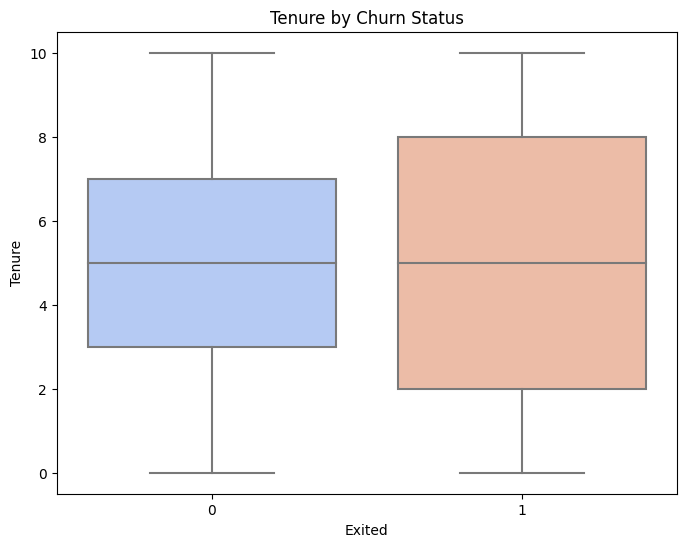

In [110]:
# Boxplot to visualize the Tenure by Churn Status
plt.figure(figsize=(8, 6))
sns.boxplot(x='Exited', y='Tenure', data=df, palette='coolwarm')
plt.title('Tenure by Churn Status')

* The above graph did not show clear relationship between Tenure and Churning. but we can check the Tenure Group for further investigation

In [111]:
# Vlue counts for each level of Tenure Group Feature.
df["Tenure Group"].value_counts()

Long-Term      4494
Medium-Term    3010
Short-Term     2496
Name: Tenure Group, dtype: int64

In [112]:
# Getting churned rate by each level of Tenure Group Feature.
churn_by_Tenure_Group = df.groupby("Tenure Group")['Exited'].mean().sort_values(ascending=False)
churn_by_Tenure_Group

Tenure Group
Short-Term     0.211538
Medium-Term    0.207641
Long-Term      0.196707
Name: Exited, dtype: float64

Text(0.5, 1.0, 'Churn Rate by Tenure Group')

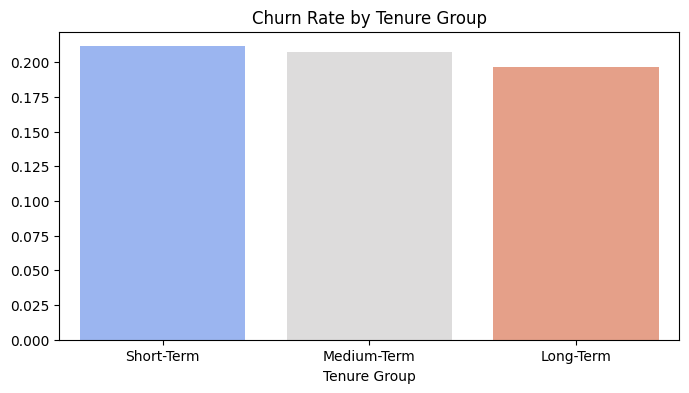

In [113]:
# Barplot graph Reflect the Churn Rate by each level of Tenure Group Feature.
plt.figure(figsize=(8, 4))
sns.barplot(x=churn_by_Tenure_Group.index, y=churn_by_Tenure_Group.values, palette='coolwarm')
plt.title('Churn Rate by Tenure Group')

* From the above ratio & graph it apear that there only lettle differnce between Tenure Greoup churn rate but the grater ratio are 21% of Total Short-Term Tenure Group (Less than 2 years) 2496 Customers 21% of them are churned. 

### 6. Balance & Balance Category Feature:

In [114]:
# Calculate average Balance Ratio for churned and not churned customers
avg_Balance_churned = df[df['Exited'] == 1]['Balance'].mean()
avg_Balance_not_churned = df[df['Exited'] == 0]['Balance'].mean()

print("Average Balance Ratio for Churned Customers:", avg_Balance_churned)
print("Average Balance Ratio for Not Churned Customers:", avg_Balance_not_churned)

Average Balance Ratio for Churned Customers: 91151.81205203732
Average Balance Ratio for Not Churned Customers: 72732.80706392063


Text(0.5, 1.0, 'Balance by Churn Status')

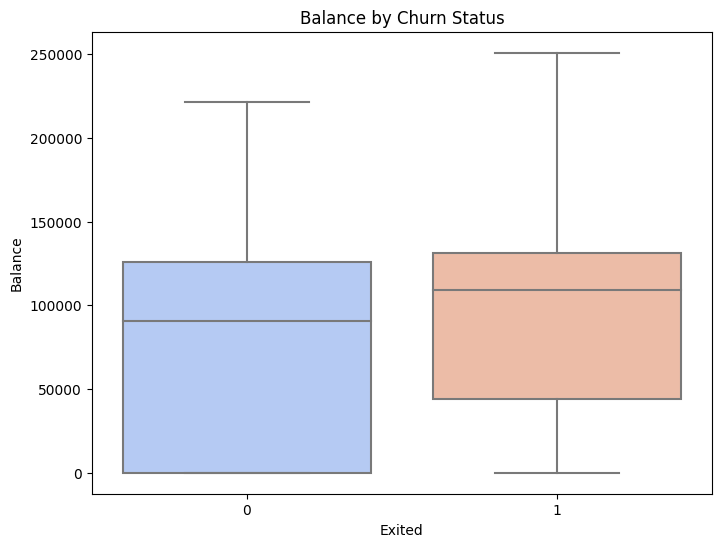

In [115]:
# Boxplot to visualize the Balance by Churn Status
plt.figure(figsize=(8, 6))
sns.boxplot(x='Exited', y='Balance', data=df, palette='coolwarm')
plt.title('Balance by Churn Status')

* The above graph show the relation ship between Balance and Churning. Higher Balances seem to correlate with a higher likelihood of churning.

In [116]:
# Vlue counts for each level of Balance Category Feature.
df["Balance Category"].value_counts()

High      4749
Zero      3580
Medium    1597
Low         74
Name: Balance Category, dtype: int64

In [117]:
# Getting churned rate by each level of Balance Category Feature.
churn_by_Balance_Category = df.groupby("Balance Category")['Exited'].mean().sort_values(ascending=False)
churn_by_Balance_Category

Balance Category
Low       0.351351
High      0.253316
Medium    0.196619
Zero      0.137989
Name: Exited, dtype: float64

Text(0.5, 1.0, 'Churn Rate by Balance Category')

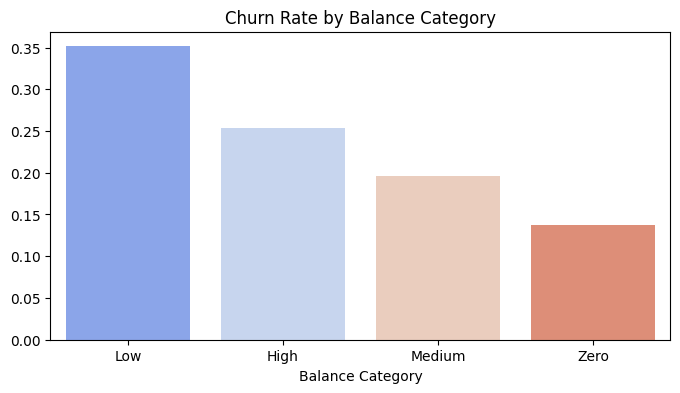

In [118]:
# Barplot graph Reflect the Churn Rate by each level of Balance Category Feature.
plt.figure(figsize=(8, 4))
sns.barplot(x=churn_by_Balance_Category.index, y=churn_by_Balance_Category.values, palette='coolwarm')
plt.title('Churn Rate by Balance Category')

* The churn rate is highest among customers with low balances (35% of 74 customers between {0 -50k}). However, the most significant impact on churn comes from the high balance category, with a 25% churn rate out of 4,749 customers in that group with 100k and above Balance.

### 7. NumOfProducts Feature:

In [119]:
# Vlue counts for each level of NumOfProducts Feature.
df["NumOfProducts"].value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

In [120]:
# Getting churned rate by each level of NumOfProducts Feature.
churn_by_NumOfProducts = df.groupby("NumOfProducts")['Exited'].mean().sort_values(ascending=False)
churn_by_NumOfProducts

NumOfProducts
4    1.000000
3    0.827068
1    0.277144
2    0.075817
Name: Exited, dtype: float64

Text(0.5, 1.0, 'Churn Rate by NumOfProducts')

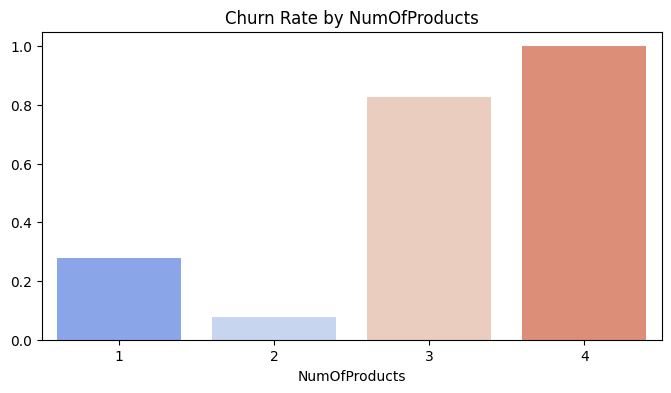

In [121]:
# Barplot graph Reflect the Churn Rate by each level of NumOfProducts Feature.
plt.figure(figsize=(8, 4))
sns.barplot(x=churn_by_NumOfProducts.index, y=churn_by_NumOfProducts.values, palette='coolwarm')
plt.title('Churn Rate by NumOfProducts')

* from the above ratio & graph it apear that the grater ratio are 100% of Total customer who have 4 NumOfProducts (60 Customer) all churned, along with 82% of the 266 customers with 3 NumOfProducts. This could indicate issues with the quality of service provided by the bank or the presence of competitors offering superior products and services.

### 8. HasCrCard Feature:

In [122]:
# Vlue counts for each level of HasCrCard Feature.
df["HasCrCard"].value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

In [123]:
# Getting churned rate by each level of HasCrCard Feature.
churn_by_HasCrCard = df.groupby("HasCrCard")['Exited'].mean().sort_values(ascending=False)
churn_by_HasCrCard

HasCrCard
0    0.208149
1    0.201843
Name: Exited, dtype: float64

Text(0.5, 1.0, 'Churn Rate by HasCrCard')

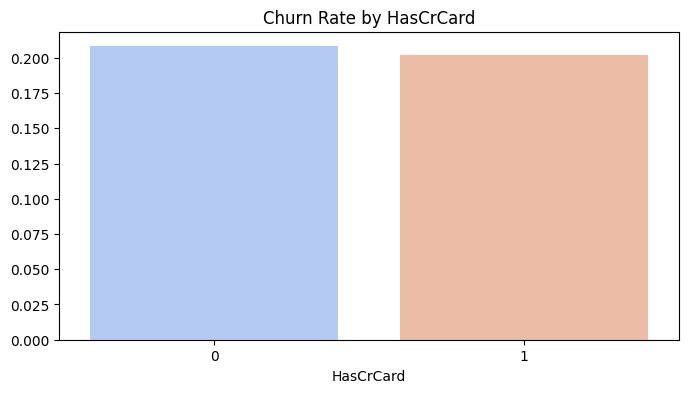

In [124]:
# Barplot graph Reflect the Churn Rate by each level of HasCrCard Feature.
plt.figure(figsize=(8, 4))
sns.barplot(x=churn_by_HasCrCard.index, y=churn_by_HasCrCard.values, palette='coolwarm')
plt.title('Churn Rate by HasCrCard')

* From the above ratio & graph the ratio are near to each other but the grater ratio are 21% of Total 2945 customers who have no Credit Card are churned, while the 20% Ratio of 7055 customers who have Credit Cart have greater effect on churn. 

### 9. Is Active Member Feature:

In [125]:
# Vlue counts for each level of IsActiveMember Feature.
df["IsActiveMember"].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

In [126]:
# Getting churned rate by each level of IsActiveMember Feature.
churn_by_IsActiveMember = df.groupby("IsActiveMember")['Exited'].mean().sort_values(ascending=False)
churn_by_IsActiveMember

IsActiveMember
0    0.268509
1    0.142691
Name: Exited, dtype: float64

Text(0.5, 1.0, 'Churn Rate by IsActiveMember')

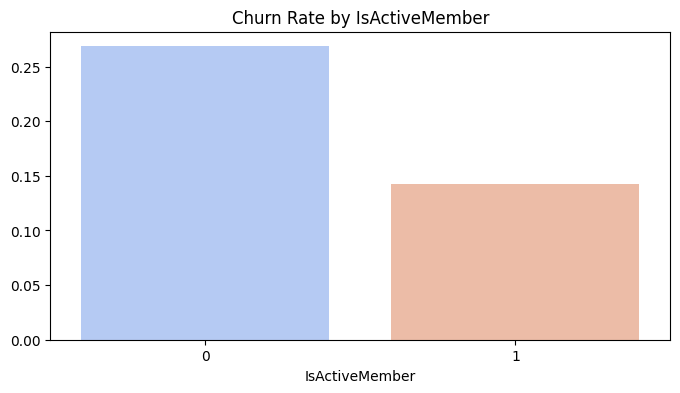

In [127]:
# Barplot graph Reflect the Churn Rate by each level of IsActiveMember Feature.
plt.figure(figsize=(8, 4))
sns.barplot(x=churn_by_IsActiveMember.index, y=churn_by_IsActiveMember.values, palette='coolwarm')
plt.title('Churn Rate by IsActiveMember')

* from the above ratio & graph the grater ratio is almost 27% of Total 4849 customers who are not IsActiveMember are churned.

### 10. EstimatedSalary & Estimated Salary Range Features:

In [128]:
# Calculate average EstimatedSalary Ratio for churned and not churned customers
avg_EstimatedSalary_churned = df[df['Exited'] == 1]['EstimatedSalary'].mean()
avg_EstimatedSalary_not_churned = df[df['Exited'] == 0]['EstimatedSalary'].mean()

print("Average EstimatedSalary Ratio for Churned Customers:", avg_EstimatedSalary_churned)
print("Average EstimatedSalary Ratio for Not Churned Customers:", avg_EstimatedSalary_not_churned)

Average EstimatedSalary Ratio for Churned Customers: 101465.67753068237
Average EstimatedSalary Ratio for Not Churned Customers: 99721.40761522038


Text(0.5, 1.0, 'EstimatedSalary by Churn Status')

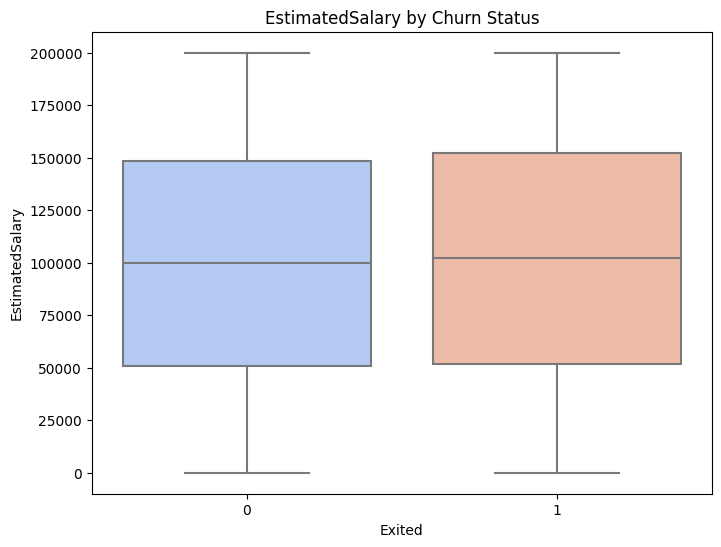

In [129]:
# Boxplot to visualize the EstimatedSalary by Churn Status
plt.figure(figsize=(8, 6))
sns.boxplot(x='Exited', y='EstimatedSalary', data=df, palette='coolwarm')
plt.title('EstimatedSalary by Churn Status')

* The above graph show the relation ship between EstimatedSalary and Churning. The Higher the EstimatedSalary the more are the chances to churn.

In [130]:
# Vlue counts for each level of Estimated Salary Range Feature.
df["Estimated Salary Range"].value_counts()

High      5010
Medium    2537
Low       2453
Name: Estimated Salary Range, dtype: int64

In [131]:
# Getting churned rate by each level of Estimated Salary Range Feature.
churn_by_EstimatedSalaryRange = df.groupby("Estimated Salary Range")['Exited'].mean().sort_values(ascending=False)
churn_by_EstimatedSalaryRange

Estimated Salary Range
High      0.208383
Low       0.199348
Medium    0.198660
Name: Exited, dtype: float64

Text(0.5, 1.0, 'Churn Rate by Estimated Salary Range')

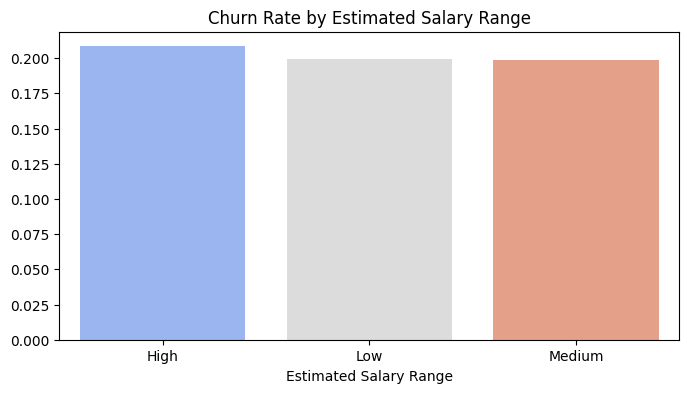

In [132]:
# Barplot graph Reflect the Churn Rate by each level of Estimated Salary Range Feature.
plt.figure(figsize=(8, 4))
sns.barplot(x=churn_by_EstimatedSalaryRange.index, y=churn_by_EstimatedSalaryRange.values, palette='coolwarm')
plt.title('Churn Rate by Estimated Salary Range')

* from the above ratio & graph the ratio are near to each other but the grater ratio which have the highest impact on churn are almost 21% of Total 5010 customers who have High Estimated Salary Range (From 100k and above) are churned.

### 11. Credit Utilization Ratio Feature:

In [133]:
# Calculate average Credit Utilization Ratio for churned and not churned customers
avg_utilization_churned = df[df['Exited'] == 1]['Credit Utilization Ratio'].mean()
avg_utilization_not_churned = df[df['Exited'] == 0]['Credit Utilization Ratio'].mean()

print("Average Credit Utilization Ratio for Churned Customers:", avg_utilization_churned)
print("Average Credit Utilization Ratio for Not Churned Customers:", avg_utilization_not_churned)

Average Credit Utilization Ratio for Churned Customers: 144.73384571805778
Average Credit Utilization Ratio for Not Churned Customers: 113.98660807153618


Text(0.5, 1.0, 'Credit Utilization Ratio by Churn Status')

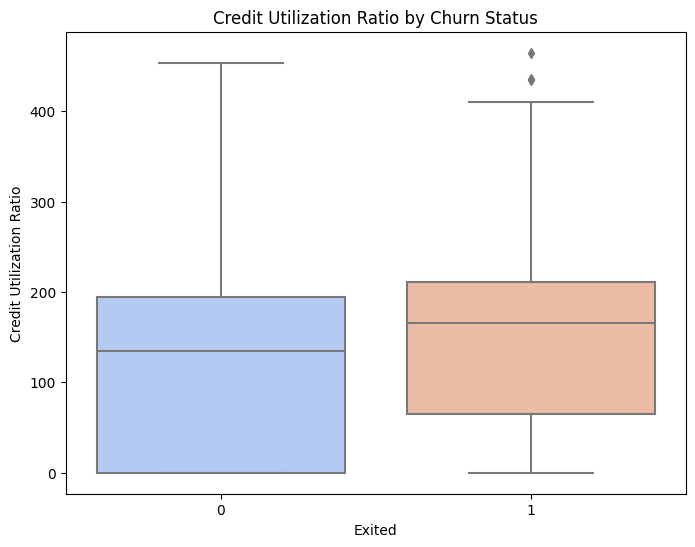

In [134]:
# Boxplot to visualize the Credit Utilization Ratio by Churn Status
plt.figure(figsize=(8, 6))
sns.boxplot(x='Exited', y='Credit Utilization Ratio', data=df, palette='coolwarm')
plt.title('Credit Utilization Ratio by Churn Status')

* The graph show the relation ship between Credit Utilization Ratio and Churning the higher the ratio the higher the churn.
* Customers with higher credit utilization ratios may be more prone to financial stress, which could potentially contribute to their decision to churn. On the other hand, customers with low credit utilization ratios may demonstrate responsible credit management and be less likely to churn.


### 12. Interaction Score Feature:

In [135]:
# Vlue counts for each level of Interaction Score Feature.
df["Interaction Score"].value_counts()

3    4038
2    3224
4    1891
1     718
5     110
6      19
Name: Interaction Score, dtype: int64

In [136]:
# Getting churned rate by each level of Interaction Score Feature.
churn_by_Interaction_Score = df.groupby("Interaction Score")['Exited'].mean().sort_values(ascending=False)
churn_by_Interaction_Score

Interaction Score
6    1.000000
5    0.818182
1    0.345404
2    0.282878
3    0.134720
4    0.118456
Name: Exited, dtype: float64

Text(0.5, 1.0, 'Churn Rate by Interaction Score')

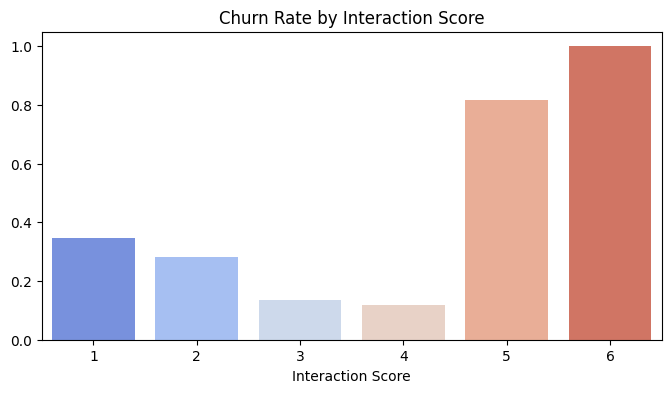

In [137]:
# Barplot graph Reflect the Churn Rate by each level of Interaction Score Feature.
plt.figure(figsize=(8, 4))
sns.barplot(x=churn_by_Interaction_Score.index, y=churn_by_Interaction_Score.values, palette='coolwarm')
plt.title('Churn Rate by Interaction Score')

* from the above ratio & graph it apear that the grater ratio are 100% of Total customer who have 6 Interaction Score (19 Customers) all churned,the second ratio almost 82% of them are churned customer who have 5 Interaction Score (110 Customer) 82% of them are churned.
* This also indicates a decrease in the quality of service or products provided by the bank that does not meet customer expectations, or there is a new competitor that offers more attractive services. In both cases, there is a greater need to improve the quality of banking services or products provided in order to mitgate the risks of customer churn.

In [138]:
# The Correlation show the relationship between each feature and churn status.
corr_mat = df.corr()['Exited'].sort_values(ascending=False)
corr_mat

Exited                      1.000000
Age                         0.285155
Credit Utilization Ratio    0.122971
Balance                     0.119529
EstimatedSalary             0.012218
CustomerId                 -0.006248
HasCrCard                  -0.007138
Tenure                     -0.014001
RowNumber                  -0.016571
CreditScore                -0.027280
NumOfProducts              -0.047820
Gender_Male                -0.105586
Interaction Score          -0.122148
IsActiveMember             -0.156128
Name: Exited, dtype: float64

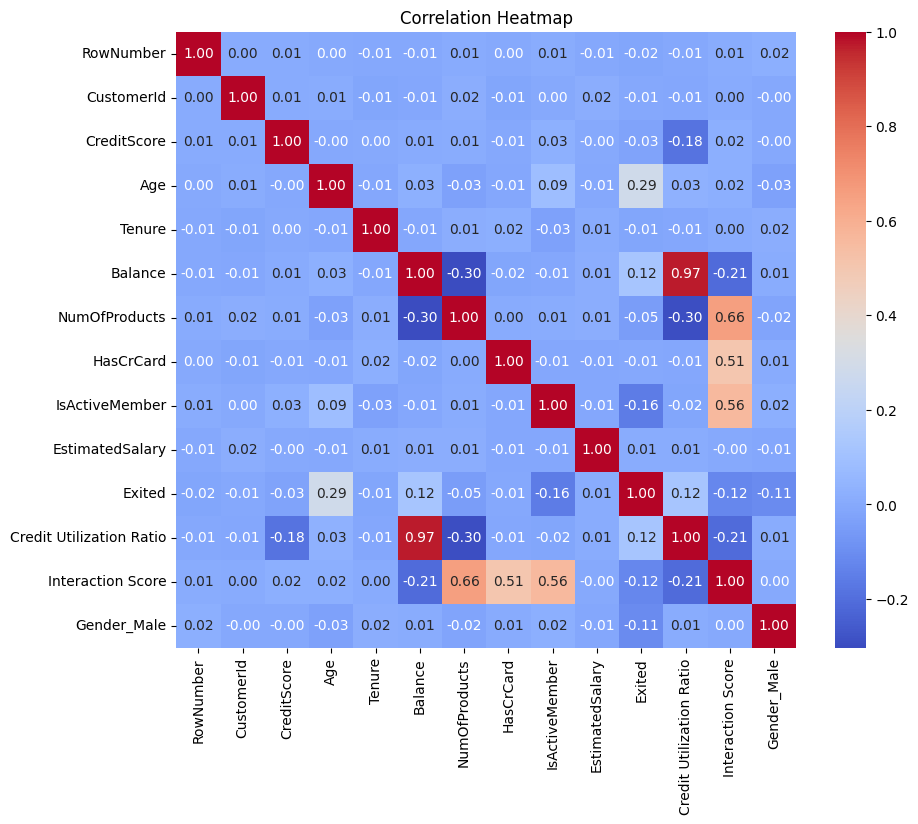

In [139]:
# Compute correlation matrix and visualize the correlation heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

* The Correlation heat map show how each feature relate or effect by each others. 
* The Correlation of each feature to churn status show that:
1. Small positive correlation with (Age: 0.29, Credit Utilization Ratio: 0.12, Balance: 0.12, EstimatedSalary: 0.01)
2. Small negative correlation with (IsActiveMember: -0.16, Interaction Score: -0.12, Gender_Male: -0.11 ,NumOfProducts: -0.05, CreditScore: -0.03, Tenure: -0.01, HasCrCard: -0.01)   

# Project outcomes or summery:

The main objective of this analysis was to explore the relationship between each feature and customer churn, with a focus on identifying feature levels that exhibit a higher churn rate.

Data Overview:

* Out of the total 10,000 customers, 2,037 (approximately 20%) churned, indicating a significant churn rate.

-------------
Correlation Analysis:

* The correlation heat map revealed the following features with small positive correlations to churn: Age (0.29), Credit Utilization Ratio (0.12), Balance (0.12), and EstimatedSalary (0.01). Conversely, the following features showed small negative correlations to churn: IsActiveMember (-0.16), Interaction Score (-0.12), Gender_Male (-0.11), NumOfProducts (-0.05), CreditScore (-0.03), Tenure (-0.01), and HasCrCard (-0.01).

------------
Feature Selection:

* For this project, we determined that the RowNumber, CustomerId, and Surname have no significant impact on churn. Therefore, we can safely drop or neglect them during the data analysis process.

------------
1. CreditScore & Credit Score Category Features:

* We observed a clear trend indicating that customers with lower Credit Scores are more likely to churn.
* An alarming 22% of the total 2,969 customers falling into the "low Credit Score" category (Credit Score less than 600) have churned.

------------
2. Geography Feature:

* Although France has the largest customer base of 5,050, only 16% of them are churned. However, the churn rate is significantly higher in Germany, where 32% of the 2,493 customers have churned.

------------
3. Gender_Male Feature:

* Interestingly, the churn rate is higher for female customers, with 25% of the total 4,499 female customers churning.

------------
4. Age & Age Group Feature:

* The data suggests that as the age of customers increases, the likelihood of churning also increases.
* Surprisingly, a substantial 45% of the 1,261 customers in the Senior Age Group (above 50 years) have churned, which contradicts the expectation that older customers typically show resistance to change. So if there is no pandemic disease where there is high death rate among senior people like coronavirus this very strange.

------------
5. Tenure & Tenure Group Feature:

* The analysis of Tenure alone does not show a clear relationship with churn.
* However, when considering customers in the Short-Term Tenure Group (less than 2 years), there is a notable churn rate of 21% among the total 2,496 customers.

-----------
6. Balance & Balance Category Feature:

* Higher Balances seem to correlate with a higher likelihood of churning.
* Notably, the churn rate is highest among customers with low balances, with 35% of the 74 customers having balances between {0 - 50k} churning.
* The most significant impact on churn comes from the high balance category, where 25% of the 4,749 customers with balances of 100k and above have churned. 
* This may indicate internal factors leading to customer dissatisfaction, or the influence of external competitors offering better services or incentives.

-----------
7. NumOfProducts Feature:

* A concerning pattern emerges as we see that 100% of the 60 customers with 4 NumOfProducts have churned, along with 82% of the 266 customers with 3 NumOfProducts.
* This could indicate issues with the quality of service provided by the bank or the presence of competitors offering superior products and services.

-----------
8. HasCrCard Feature:

* The churn rates for customers with and without Credit Cards are quite close. However, 21% of the total 2,945 customers without a Credit Card have churned, while the most significant impact on churn comes from 20% of the 7,055 customers with a Credit Card have churned.

-----------
9. Is Active Member Feature:

* Approximately 27% of the total 4,849 inactive customers have churned, indicating that customer engagement is essential in retaining them.

-----------
10. EstimatedSalary & Estimated Salary Range Features:

* Customers with higher Estimated Salaries have a higher likelihood of churning.
* A significant 21% of the total 5,010 customers falling into the "High Estimated Salary Range" (100k and above) have churned.
* This suggests a need to address potential internal factors causing customer dissatisfaction or consider the impact of external competitors.

-----------
11. Credit Utilization Ratio Feature:

* A clear relationship emerges between Credit Utilization Ratio and churning: the higher the ratio, the higher the churn rate.
* Customers with higher credit utilization ratios may face financial stress, leading them to churn. Conversely, customers with low credit utilization ratios exhibit responsible credit management and are less likely to churn.

-----------
12. Interaction Score Feature:

* Remarkably, all customers (100%) with an Interaction Score of 6 (19 Customers) have churned, and approximately 82% of 110 customers with an Interaction Score of 5 have also churned.
* This emphasizes the need for the bank to improve service quality and product offerings to meet customer expectations and compete effectively with other providers in the market.

-------------
In conclusion, the analysis highlights several important insights regarding customer churn. It is crucial for the bank to address specific factors, such as Credit Score, Age, Balance, NumOfProducts, EstimatedSalary, and Interaction Score, to mitigate churn risks effectively. By understanding and acting on these patterns, the bank can enhance customer retention, improve service quality, and stay competitive in the market.

_________________________________
Project prepared by:
Diaa Aldein AlSayed Ibrahim Osman